In [5]:
# just to check if everything is working fine in vscode
print("Hello World")

Hello World


# 1. Setup and Importing Libraries

This notebook follows the tutorial https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html

PyTorch has two primitives to work with data: torch.utils.data.DataLoader and torch.utils.data.Dataset. Dataset stores the samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset.

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader # wraps an iterable around the dataset
from torchvision import datasets    # stores the samples and their corresponding labels
from torchvision.transforms import transforms  # transformations we can perform on our dataset
from torchvision.transforms import ToTensor

In [1]:
import pandas as pd
import os
import numpy as np

# 2. Getting the dataset

In [4]:
# getting the path for the dataset

# Get the parent directory
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)

train_small_path = os.path.join(parent_directory, 'data','deepfake-ecg-small','train.csv')
print(train_small_path)


c:\Users\Hansa Alahakoon\Desktop\4th year\FYP\e17-4yp-Comprehensive-ECG-analysis-with-Deep-Learning-on-GPU-accelerators\data\deepfake-ecg-small\train.csv


In [8]:
# as dataframes
train_small = pd.read_csv(train_small_path)
train_small.head()

,TestID,patid,AcquisitionDateTime_DT,AnalysisSoftwareVersion,ecgday,avgrrinterval,tonset,NumQRSComplexes,VentRate,AtrialRate,...,sl_1180,sl_1672,sl_1680,sl_1682,sl_1684,sl_1687,sl_1693,sl_1699,numcodes,ecgcategory
0,140000,0,NaN,NaN,NaN,1006.0,329.0,10.0,60,60,...,False,False,False,False,True,False,False,False,2,Normal ECG
1,140001,1,NaN,NaN,NaN,918.0,316.0,11.0,65,65,...,False,False,False,False,True,False,False,False,2,Normal ECG
2,212220,3,NaN,NaN,NaN,982.0,325.0,10.0,61,61,...,False,False,False,False,True,False,False,False,3,Normal ECG
3,223331,4,NaN,NaN,NaN,860.0,315.0,12.0,70,70,...,False,False,False,False,True,False,False,False,2,Normal ECG
4,234442,5,NaN,NaN,NaN,962.0,322.0,11.0,62,62,...,False,False,False,False,True,False,False,False,2,Normal ECG


In [10]:
train_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 788 entries, TestID to ecgcategory
dtypes: bool(126), float64(646), int64(15), object(1)
memory usage: 51.7+ MB


In [9]:
train_small.describe()

,TestID,patid,AcquisitionDateTime_DT,AnalysisSoftwareVersion,ecgday,avgrrinterval,tonset,NumQRSComplexes,VentRate,AtrialRate,...,BitFlag_v2,BitFlag_v3,BitFlag_v4,BitFlag_v5,BitFlag_v6,BitFlag_iii,BitFlag_avr,BitFlag_avl,BitFlag_avf,numcodes
count,10000.000000,10000.000000,0.0,0.0,0.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,223188.388400,6168.569800,NaN,NaN,NaN,869.964000,317.220600,11.485200,69.645100,69.662800,...,330.896400,241.626300,99.454800,20.856700,4.656800,21.48930,10.099200,10.277900,34.331000,2.062000
std,49258.505355,3571.658916,NaN,NaN,NaN,86.722078,7.312789,1.297131,7.540281,7.541829,...,118.854336,170.645531,152.089305,73.101831,25.707841,83.31158,60.197001,53.145174,126.502022,0.241582
min,140000.000000,0.000000,NaN,NaN,NaN,598.000000,290.000000,9.000000,60.000000,60.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,2.000000
25%,197107.250000,3064.750000,NaN,NaN,NaN,812.000000,313.000000,11.000000,64.000000,64.000000,...,384.000000,7.000000,1.000000,1.000000,1.000000,0.00000,2.000000,0.000000,1.000000,2.000000
50%,228304.500000,6186.500000,NaN,NaN,NaN,880.000000,318.000000,11.000000,68.000000,68.000000,...,385.000000,385.000000,5.000000,1.000000,1.000000,6.00000,6.000000,4.000000,5.000000,2.000000
75%,259013.750000,9256.250000,NaN,NaN,NaN,940.000000,322.000000,12.000000,74.000000,74.000000,...,385.000000,385.000000,129.000000,7.000000,7.000000,6.00000,6.000000,6.000000,7.000000,2.000000
max,301724.000000,12326.000000,NaN,NaN,NaN,1008.000000,342.000000,17.000000,100.000000,100.000000,...,647.000000,641.000000,771.000000,775.000000,771.000000,775.00000,774.000000,775.000000,775.000000,4.000000


# 3. ECG plot

In [19]:
import ecg_plot

Matplotlib is building the font cache; this may take a moment.


In [34]:
# function to form a matrix from a .asc file
import numpy as np
def form_matrix(filename):
    matrix = []
    with open(filename, 'r') as f:
        for line in f:
            matrix.append(line.split())
    # turn a list of list to a numpy matrix
    matrix = np.array(matrix, dtype=np.float64)
    return np.transpose(matrix)         # 8x5000 shape


In [40]:
# get a .asc file just to test --> 5.asc

print(parent_directory)
asc_path = os.path.join(parent_directory, 'data','deepfake-ecg-small','train','20.asc')
print(asc_path)


c:\Users\Hansa Alahakoon\Desktop\4th year\FYP\e17-4yp-Comprehensive-ECG-analysis-with-Deep-Learning-on-GPU-accelerators
c:\Users\Hansa Alahakoon\Desktop\4th year\FYP\e17-4yp-Comprehensive-ECG-analysis-with-Deep-Learning-on-GPU-accelerators\data\deepfake-ecg-small\train\20.asc


In [41]:
test_ecg = form_matrix(asc_path)

In [42]:
test_ecg

array([[-12., -32., -11., ..., -80., -75., -71.],
       [-76., -53., -44., ..., -85., -75., -92.],
       [ -8.,   0., -19., ...,  50.,  42.,  53.],
       ...,
       [-56., -61., -54., ..., -63., -70., -74.],
       [-75., -93., -90., ..., -94., -81., -93.],
       [-54., -48.,  -5., ..., -75., -87., -83.]])

In [43]:
# get the shape of an nd array
test_ecg.shape

(8, 5000)

ecg	--> m x n ECG signal data, which m is number of leads and n is length of signal.

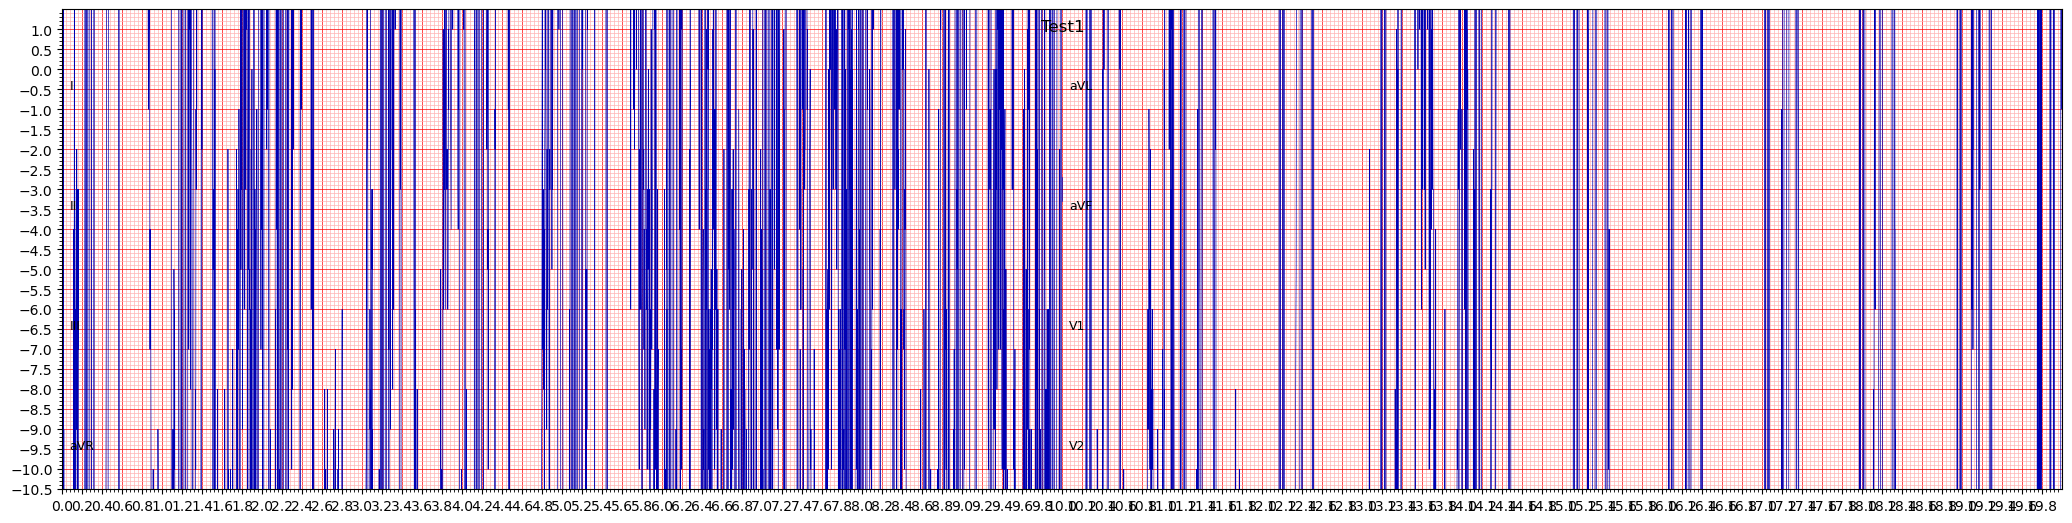

In [44]:

ecg_plot.plot(ecg = test_ecg, title='Test1')
ecg_plot.show()